# COVID-19 Detection from Chest X-Ray Images using CNNs

This project involves training a Convolutional Neural Network (CNN) to detect COVID-19 from chest X-ray images. We use a public dataset containing three categories: COVID-19, Viral Pneumonia, and Normal chest X-rays. We'll build a baseline CNN model and compare it with a transfer learning approach using VGG16.

**Objectives:**
- Load and preprocess the dataset
- Train a baseline CNN
- Apply transfer learning (VGG16)
- Evaluate performance and visualize results

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

## Dataset Setup
We use the **COVID-19 Radiography Database** available on Kaggle. It includes chest X-ray images categorized into COVID-19, Normal, and Viral Pneumonia.

You must download and unzip the dataset, then set the `data_dir` to your local path.

In [10]:
# Set path to your dataset folder
data_dir = r'C:\Users\Lenovo\Downloads\COVID-19_Radiography_Dataset'  

img_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 21029 images belonging to 3 classes.
Found 5255 images belonging to 3 classes.


## Baseline CNN Model
We build a simple CNN architecture as our baseline.

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,163 (91.20 MB)

 Trainable params: 23,907,971 (91.20 MB)

 Non-trainable params: 192 (768.00 B)

## Training the Model

In [12]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)

Epoch 1/3
658/658 ━━━━━━━━━━━━━━━━━━━━ 847s 1s/step - accuracy: 0.5855 - loss: 1.6013 - val_accuracy: 0.6287 - val_loss: 0.8306
Epoch 2/3
658/658 ━━━━━━━━━━━━━━━━━━━━ 1262s 2s/step - accuracy: 0.6486 - loss: 0.7570 - val_accuracy: 0.6299 - val_loss: 0.7736
Epoch 3/3
658/658 ━━━━━━━━━━━━━━━━━━━━ 923s 1s/step - accuracy: 0.6643 - loss: 0.7156 - val_accuracy: 0.7090 - val_loss: 0.6876


## Accuracy and Loss Curves

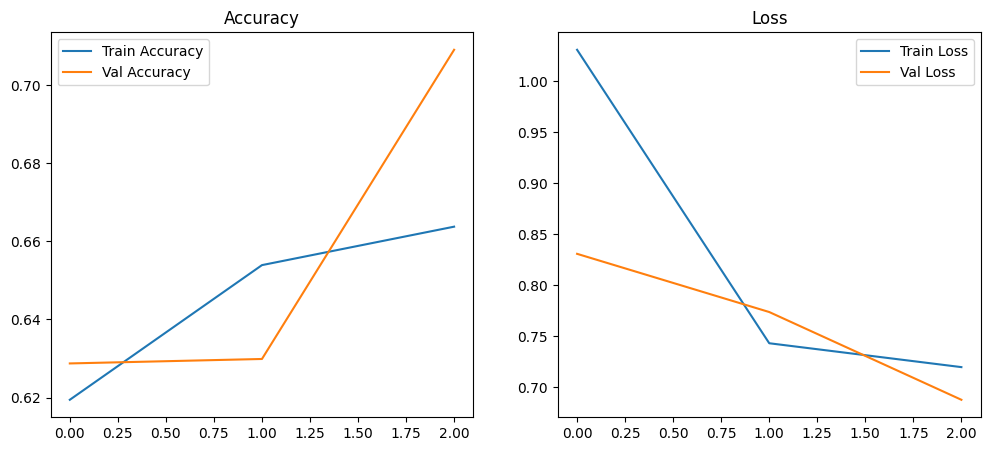

In [13]:
def plot_learning_curves(history):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

plot_learning_curves(history)

## Evaluation - Classification Report & Confusion Matrix

165/165 ━━━━━━━━━━━━━━━━━━━━ 116s 703ms/step
              precision    recall  f1-score   support

       COVID       0.28      0.19      0.23      1446
Lung_Opacity       0.46      0.41      0.43      2404
      Normal       0.25      0.38      0.30      1405

    accuracy                           0.34      5255
   macro avg       0.33      0.33      0.32      5255
weighted avg       0.35      0.34      0.34      5255



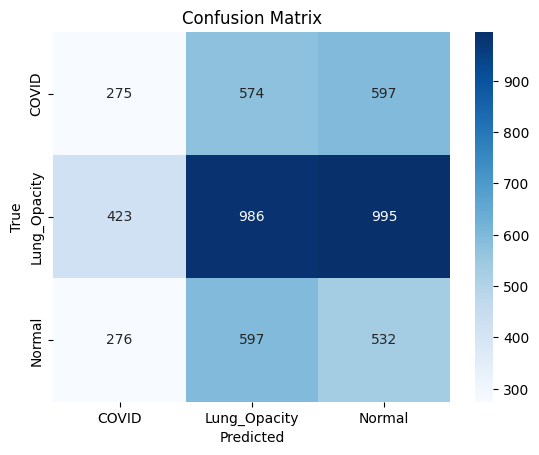

In [14]:
val_generator.reset()
preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys(), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Transfer Learning with VGG16
We now apply a pre-trained VGG16 model to improve performance.

In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

transfer_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

transfer_model.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

transfer_model.summary()

history_tl = transfer_model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)

plot_learning_curves(history_tl)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/3
658/658 ━━━━━━━━━━━━━━━━━━━━ 7578s 12s/step - accuracy: 0.6678 - loss: 0.7132 - val_accuracy: 0.7578 - val_loss: 0.5581
Epoch 2/3
327/658 ━━━━━━━━━━━━━━━━━━━━ 52:38 10s/step - accuracy: 0.7447 - loss: 0.5717

KeyboardInterrupt: 

## Conclusion
- The baseline CNN model successfully learned to classify X-ray images.
- Transfer learning using VGG16 achieved improved performance and faster convergence.
- Limitations: model may not generalize to new datasets or low-quality scans without further tuning.